# Dataset
#### The dataset comes from [Cricsheet](https://cricsheet.org/), and it is related to One Day Internation matches for all male players, it is in the yaml format. The classification goal is to analyse the data only for India and Australia and to predict who win the Coming ODI between Australia and India.  
#### The dataset can be downloaded from [here](https://cricsheet.org/downloads/odis_male.zip)

In [2]:
import glob
import pandas as pd
import yaml

path =r'E:\Hackathron\India_VS_Australia\odis_male' # use your path
allFiles = glob.glob(path + "/*.yaml")

list_ = []

for file_ in allFiles:
    with open(file_, 'r') as stream:
        try:
            ODI = yaml.load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    if 'INDIA' in [x.strip().upper() for x in ODI['info']['teams']] and 'AUSTRALIA' in [x.strip().upper() for x in ODI['info']['teams']]:
        team = []
        batsman = []
        bowler = []
        batsman_runs = []
        extra_runs = []
        total_runs = []
        fielder = []
        outby = []
        player_out = []
        wicket = []
        sixes = []
        fours = []
        innings = []
        for i, j in enumerate(ODI['innings']):
            for k in ODI['innings'][i]:
                for l,m in enumerate(ODI['innings'][i][k]['deliveries']):
                    for n in list(ODI['innings'][i][k]['deliveries'][l].keys()):
                        innings.append(k)
                        team.append(ODI['innings'][i][k]['team'])
                        batsman.append(ODI['innings'][i][k]['deliveries'][l][n]['batsman'])
                        bowler.append(ODI['innings'][i][k]['deliveries'][l][n]['bowler'])
                        batsman_runs.append(ODI['innings'][i][k]['deliveries'][l][n]['runs']['batsman'])
                        extra_runs.append(ODI['innings'][i][k]['deliveries'][l][n]['runs']['extras'])
                        total_runs.append(ODI['innings'][i][k]['deliveries'][l][n]['runs']['total'])
                        try:
                            fielder.append(ODI['innings'][i][k]['deliveries'][l][n]['wicket']['fielders'][0])
                            outby.append(ODI['innings'][i][k]['deliveries'][l][n]['wicket']['kind'])
                            player_out.append(ODI['innings'][i][k]['deliveries'][l][n]['wicket']['player_out'])
                            wicket.append(1)
                        except:
                            fielder.append("None")
                            outby.append("None")
                            player_out.append("None")
                            wicket.append(0)
                        if ODI['innings'][i][k]['deliveries'][l][n]['runs']['batsman'] == 6:
                            sixes.append(1)
                        else:
                            sixes.append(0)
                        if ODI['innings'][i][k]['deliveries'][l][n]['runs']['batsman'] == 4:
                            fours.append(1)
                        else:
                            fours.append(0)
        ODI_International = {'Innings': innings,
                        'Team': team,
                        'Batsman': batsman,
                        'Bowler': bowler,
                        'Batsman_Runs': batsman_runs,
                        'Extra_Runs': extra_runs,
                        'Total_Runs': total_runs,
                        'Fielder': fielder,
                        'OutBy': outby,
                        'Player_Out': player_out,
                        'Wicket': wicket,
                        'Sixes': sixes,
                        'Fours': fours}
        data = pd.DataFrame.from_dict(ODI_International)
        df = data.groupby(['Innings','Team','Batsman','Bowler','OutBy','Fielder','Player_Out'],as_index=False).sum()
        try:
            df['City'] = ODI['info']['city']
        except:
            df['City'] = ODI['info']['venue'].split(" ")[0]
        df['Dates'] =  ODI['info']['dates'][0]
        try:
            df['Winner'] =  ODI['info']['outcome']['winner']
        except:
            df['Winner'] = "No Result"
        try:
            df['Man Of The Match'] = ODI['info']['player_of_match'][0]
        except:
            df['Man Of The Match'] = "No One"
        df['Toss_Decision'] = ODI['info']['toss']['decision']
        df['Toss_Winner'] =  ODI['info']['toss']['winner']
        df['Venue'] =  ODI['info']['venue']
        list_.append(df)
        
frame = pd.concat(list_, axis = 0, ignore_index = True)

In [3]:
frame.to_excel("India_Australia_ODI.xlsx", index = False)

In [4]:
# Now lets Import the necessary libraries
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [5]:
RawDataSets = pd.read_excel("India_Australia_ODI.xlsx")

print(RawDataSets.shape)
print(list(RawDataSets.columns))

(2859, 20)
['Innings', 'Team', 'Batsman', 'Bowler', 'OutBy', 'Fielder', 'Player_Out', 'Batsman_Runs', 'Extra_Runs', 'Total_Runs', 'Wicket', 'Sixes', 'Fours', 'City', 'Dates', 'Winner', 'Man Of The Match', 'Toss_Decision', 'Toss_Winner', 'Venue']


### After converting the yaml data to dataframe we get 20 columns and 2859 rows, each row is the aggregation on categorical columns and it represend each bowl score which is aggregated in the data  
### now lets check the data which we have extracted to get a hang of it

In [7]:
RawDataSets.head()

,Innings,Team,Batsman,Bowler,OutBy,Fielder,Player_Out,Batsman_Runs,Extra_Runs,Total_Runs,Wicket,Sixes,Fours,City,Dates,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue
0,1st innings,India,D Mongia,GD McGrath,None,None,None,4,0,4,0,0,1,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali"
1,1st innings,India,D Mongia,MG Johnson,None,None,None,2,0,2,0,0,0,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali"
2,1st innings,India,D Mongia,NW Bracken,None,None,None,8,0,8,0,0,1,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali"
3,1st innings,India,D Mongia,SR Watson,None,None,None,4,0,4,0,0,1,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali"
4,1st innings,India,D Mongia,SR Watson,caught,MEK Hussey,D Mongia,0,0,0,1,0,0,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali"


### Now lets discuss the input variuable, most of the variable are self explanatory, let discuss some Batsman, bowler, outby, fielder and player out are some of the columns that are aggregated  
### For example - when batsman "D Mongia" is batting and he has faced bowler "GD McGrath" how many run he made, wicket and etc, so basically it's a aggregation of all the bowls faced by "D Mongia" when "GD McGrath" is bowling

### Predict variable (desired target):
### Winner — It is a categorical variable which holds the value of team name who has win the match  
### Data exploration  
we see that the data is still not in the correct format for analysis, since some of the columns are increasing the rowns so for our analysis purpose we will take the subset of data for answering the 1st questions winner of the series

In [10]:
ODI_Outcome = RawDataSets.loc[:,['Innings', 'Team', 'Batsman_Runs', 'Extra_Runs', 'Total_Runs', 'Wicket',
       'Sixes', 'Fours', 'City', 'Dates', 'Winner', 'Man Of The Match',
       'Toss_Decision', 'Toss_Winner', 'Venue']]

In [11]:
# for this we need to aggregate the data based on below columns

Aggre_ODI = ODI_Outcome.groupby(['Innings','Team','City','Dates','Winner','Man Of The Match','Toss_Decision','Toss_Winner','Venue'],as_index=False).sum()

Aggre_ODI.describe()

,Batsman_Runs,Extra_Runs,Total_Runs,Wicket,Sixes,Fours
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,237.178571,14.880952,252.059524,5.000000,4.238095,21.619048
std,78.532958,7.575173,79.370164,2.507819,3.835846,8.489405
min,4.000000,2.000000,9.000000,0.000000,0.000000,1.000000
25%,194.750000,9.000000,215.250000,3.000000,2.000000,15.000000
50%,248.000000,13.500000,264.000000,5.000000,3.000000,22.500000
75%,289.250000,20.000000,306.250000,7.000000,6.000000,27.250000
max,371.000000,39.000000,383.000000,10.000000,19.000000,40.000000


In [12]:
# now lets see the data which we have aggregated above

Aggre_ODI = Aggre_ODI.sort_values(by=['Dates','Innings'])

In [13]:
Aggre_ODI.head()

,Innings,Team,City,Dates,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Batsman_Runs,Extra_Runs,Total_Runs,Wicket,Sixes,Fours
13,1st innings,Australia,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,234,10,244,10,4,24
68,2nd innings,India,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,27,8,35,4,1,3
14,1st innings,Australia,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,194,19,213,8,6,15
69,2nd innings,India,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,168,27,195,5,2,11
33,1st innings,India,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali",231,18,249,5,0,27


In [14]:
# now to analyse each ODI matched we don't recquired bowl level information, so we will create a new data wits with only below columns:

# we need to create a new column for innings and team

Aggre_ODI["Team_Innings"] = Aggre_ODI["Innings"] +"_"+ Aggre_ODI["Team"]

ODI_Analysis = pd.get_dummies(Aggre_ODI[['Team_Innings']])

In [15]:
# Now we have data in the format where if we aggregate we don't lose the innings information

ODI_Analysis.head()

,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,Team_Innings_2nd innings_India
13,1,0,0,0
68,0,0,0,1
14,1,0,0,0
69,0,0,0,1
33,0,1,0,0


In [16]:
# now lets join the data with the original data and lets see if every thing is coming accurate

ODI_Join = Aggre_ODI.join(ODI_Analysis)

ODI_Join.head()

,Innings,Team,City,Dates,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Batsman_Runs,Extra_Runs,Total_Runs,Wicket,Sixes,Fours,Team_Innings,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,Team_Innings_2nd innings_India
13,1st innings,Australia,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,234,10,244,10,4,24,1st innings_Australia,1,0,0,0
68,2nd innings,India,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,27,8,35,4,1,3,2nd innings_India,0,0,0,1
14,1st innings,Australia,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,194,19,213,8,6,15,1st innings_Australia,1,0,0,0
69,2nd innings,India,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,168,27,195,5,2,11,2nd innings_India,0,0,0,1
33,1st innings,India,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali",231,18,249,5,0,27,1st innings_India,0,1,0,0


In [17]:
# now lets remove the Innings , Team and Team_Innings column and then aggregate the data

ODI_Final = ODI_Join.drop(columns=['Innings','Team','Team_Innings','Batsman_Runs','Extra_Runs','Total_Runs','Wicket','Sixes','Fours'])

In [18]:
# Now lets aggreagte the data and see the final data

Final_ODI = ODI_Final.groupby(['City','Dates','Winner','Man Of The Match','Toss_Decision','Toss_Winner','Venue'],as_index=False).sum()

print(Final_ODI.shape)

Final_ODI.head()

(43, 11)


,City,Dates,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,Team_Innings_2nd innings_India
0,Adelaide,2008-02-17,Australia,MJ Clarke,bat,Australia,Adelaide Oval,1,0,0,1
1,Adelaide,2012-02-12,India,G Gambhir,bat,Australia,Adelaide Oval,1,0,0,1
2,Ahmedabad,2011-03-24,India,Yuvraj Singh,bat,Australia,"Sardar Patel Stadium, Motera",1,0,0,1
3,Bangalore,2007-09-29,No Result,No One,bat,Australia,M Chinnaswamy Stadium,1,0,0,1
4,Bangalore,2013-11-02,India,RG Sharma,field,Australia,M Chinnaswamy Stadium,0,1,1,0


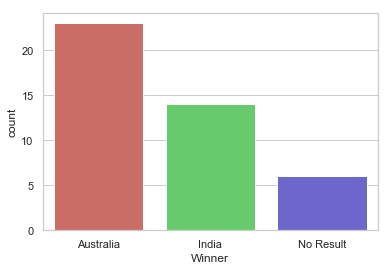

In [19]:
# now we have 43 rows which is the exact number of matched played by india and australia during 2006 to 2016
# Now lets explore the data

# lets visualize the dependent variable

sns.countplot(x='Winner',data=Final_ODI, palette='hls')
plt.show()

In [20]:
# Now we will see who has won most of the times
pd.DataFrame(Final_ODI.Winner.value_counts(normalize=True))

,Winner
Australia,0.534884
India,0.325581
No Result,0.139535


In [21]:
# We see that Our dependent variable are imbalanced, and the ratio of India winning to Australia is 32:53.

# Before we go ahead to balance the dependent variable, let’s do some more exploration.

# Now we will see how many times matches were played between india and australia in which city
pd.DataFrame(Final_ODI.City.value_counts())

,City
Sydney,6
Brisbane,4
Chandigarh,4
Melbourne,4
Nagpur,3
Adelaide,2
Vadodara,2
Kuala Lumpur,2
Bangalore,2
Hyderabad,2


In [22]:
# now we will see what is the impact of toss decison on winning

Winner_Toss = Final_ODI.groupby("Toss_Decision").Winner.value_counts(normalize=True)

pd.DataFrame(Winner_Toss)

Winner
Toss_Decision Winner             
bat           Australia  0.580645
              India      0.290323
              No Result  0.129032
field         Australia  0.416667
              India      0.416667
              No Result  0.166667

In [23]:
# now we will visualise the able table using crossmatrix

Winner_Toss.unstack()

#  we see that when toss decision is bat the team wins most of the times

Winner,Australia,India,No Result
Toss_Decision,,,
bat,0.580645,0.290323,0.129032
field,0.416667,0.416667,0.166667


In [24]:
# now lets analyse the venue odi played between india and australia

pd.DataFrame(Final_ODI.groupby("City").Venue.value_counts())

Venue
City          Venue                                                    
Adelaide      Adelaide Oval                                           2
Ahmedabad     Sardar Patel Stadium, Motera                            1
Bangalore     M Chinnaswamy Stadium                                   2
Brisbane      Brisbane Cricket Ground, Woolloongabba                  4
Canberra      Manuka Oval                                             1
Centurion     SuperSport Park                                         1
Chandigarh    Punjab Cricket Association Stadium, Mohali              3
              Sector 16 Stadium                                       1
Delhi         Feroz Shah Kotla                                        1
Guwahati      Nehru Stadium                                           1
Hyderabad     Rajiv Gandhi International Stadium, Uppal               2
Jaipur        Sawai Mansingh Stadium                                  1
Kochi         Nehru Stadium                                           1
Kuala Lumpur  Kinrara Academy Oval                                    2
Melbourne     Melbourne Cricket Ground                                4
Mumbai        Wankhede Stadium                                        1
Nagpur        Vidarbha Cricket Association Stadium, Jamtha            2
              Vidarbha Cricket Association Ground                     1
Perth         Western Australia Cricket Association Ground            1
Pune          Maharashtra Cricket Association Stadium                 1
Ranchi        JSCA International Stadium Complex                      1
Sydney        Sydney Cricket Ground                                   6
Vadodara      Reliance Stadium                                        2
Visakhapatnam Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      1

In [25]:
# we see from the above venue, that nagpur has two cricket stadium with some what same name,
# it may be because of the data discripency
# But when we verified the data with the actual stadium we know that there are two stadium with this name, so the data is accurate

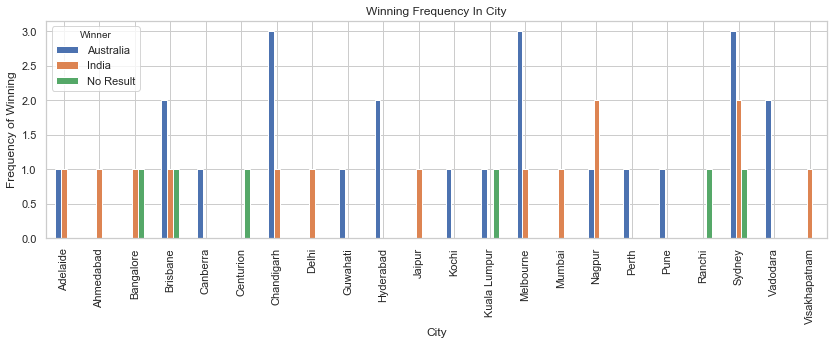

In [26]:
# Now lets see in which city india has won most of the time

pd.crosstab(Final_ODI.City,Final_ODI.Winner).plot(kind='bar',figsize=(14,4))
plt.title('Winning Frequency In City')
plt.xlabel('City')
plt.ylabel('Frequency of Winning')
plt.show()

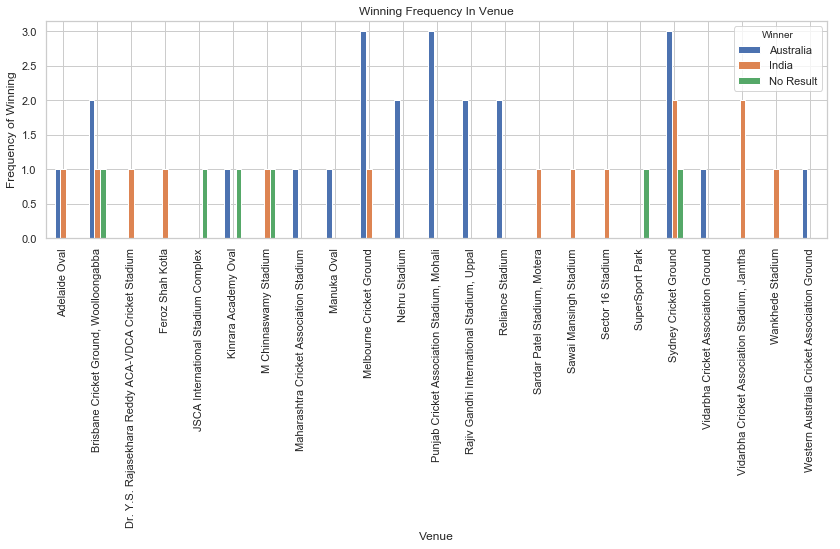

In [27]:
# we see that the frequescy of winning in city can be a good predictor
# we see that in nagpur india has won most of the time and australia in chandigarh for india cities

# now lets see the same for venue

pd.crosstab(Final_ODI.Venue,Final_ODI.Winner).plot(kind='bar',figsize=(14,4))
plt.title('Winning Frequency In Venue')
plt.xlabel('Venue')
plt.ylabel('Frequency of Winning')
plt.show()

In [28]:
# Now lets create additional column quarter from date column

Final_ODI["Quarter"] = Final_ODI["Dates"].apply(lambda x: x.quarter)

Final_ODI.sort_values(by=['Dates']).head()

,City,Dates,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,Team_Innings_2nd innings_India,Quarter
21,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,1,0,0,1,3
22,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,1,0,0,1,3
11,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali",0,1,1,0,4
3,Bangalore,2007-09-29,No Result,No One,bat,Australia,M Chinnaswamy Stadium,1,0,0,1,3
20,Kochi,2007-10-02,Australia,BJ Haddin,field,India,Nehru Stadium,1,0,0,1,4


In [29]:
# now lets see in which quarter india has won most of the time

Winner_Quarter = Final_ODI.groupby("Quarter").Winner.value_counts()

Winner_Quarter.unstack()

# We see that australia has won equal number of time in 1st and 4th quarter, and India has won most in 4th quarter

Winner,Australia,India,No Result
Quarter,,,
1,11.0,6.0,2.0
3,1.0,NaN,3.0
4,11.0,8.0,1.0


In [30]:
# Now lets model the the algorithm to predict who will win the series

# So the first step is to convert the data into machine format

# first we need to remove the data column

ODI_Machine = Final_ODI.drop(columns='Dates')

ODI_Machine.head()

,City,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,Team_Innings_2nd innings_India,Quarter
0,Adelaide,Australia,MJ Clarke,bat,Australia,Adelaide Oval,1,0,0,1,1
1,Adelaide,India,G Gambhir,bat,Australia,Adelaide Oval,1,0,0,1,1
2,Ahmedabad,India,Yuvraj Singh,bat,Australia,"Sardar Patel Stadium, Motera",1,0,0,1,1
3,Bangalore,No Result,No One,bat,Australia,M Chinnaswamy Stadium,1,0,0,1,3
4,Bangalore,India,RG Sharma,field,Australia,M Chinnaswamy Stadium,0,1,1,0,4


In [31]:
# now we need to create the dependent variable with value 0 and 1 for creating ML model

# First we will remove the data with no result

ODI_Machine = ODI_Machine.loc[ODI_Machine['Winner'] != 'No Result']

print(ODI_Machine.shape)

(37, 11)


In [32]:
# Now we will create a new column Prediction with values 0 and 1.
# 0 will represend India and 1 will Represend Australia

ODI_Machine["Winner_Y"] = ODI_Machine['Winner'].apply(lambda x: 1 if x == 'Australia' else 0)

ODI_Machine.loc[:,["Winner","Winner_Y"]]

,Winner,Winner_Y
0,Australia,1
1,India,0
2,India,0
4,India,0
6,India,0
7,Australia,1
8,Australia,1
9,Australia,1
11,Australia,1
12,India,0


In [33]:
# Now we will remove the winner column

Final_Data = ODI_Machine.drop(columns=['Man Of The Match','Winner','Winner_Y','Team_Innings_1st innings_Australia','Team_Innings_2nd innings_Australia'])

Final_Data.head()

,City,Toss_Decision,Toss_Winner,Venue,Team_Innings_1st innings_India,Team_Innings_2nd innings_India,Quarter
0,Adelaide,bat,Australia,Adelaide Oval,0,1,1
1,Adelaide,bat,Australia,Adelaide Oval,0,1,1
2,Ahmedabad,bat,Australia,"Sardar Patel Stadium, Motera",0,1,1
4,Bangalore,field,Australia,M Chinnaswamy Stadium,1,0,4
6,Brisbane,bat,India,"Brisbane Cricket Ground, Woolloongabba",1,0,1


In [34]:
# Create dummy variables
# That is variables with only two values, zero and one.

Machine_Data = pd.get_dummies(Final_Data, drop_first=True)

print(Machine_Data.shape)
print(list(Machine_Data.columns))

(37, 44)
['Team_Innings_1st innings_India', 'Team_Innings_2nd innings_India', 'Quarter', 'City_Ahmedabad', 'City_Bangalore', 'City_Brisbane', 'City_Canberra', 'City_Chandigarh', 'City_Delhi', 'City_Guwahati', 'City_Hyderabad', 'City_Jaipur', 'City_Kochi', 'City_Kuala Lumpur', 'City_Melbourne', 'City_Mumbai', 'City_Nagpur', 'City_Perth', 'City_Pune', 'City_Sydney', 'City_Vadodara', 'City_Visakhapatnam', 'Toss_Decision_field', 'Toss_Winner_India', 'Venue_Brisbane Cricket Ground, Woolloongabba', 'Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Venue_Feroz Shah Kotla', 'Venue_Kinrara Academy Oval', 'Venue_M Chinnaswamy Stadium', 'Venue_Maharashtra Cricket Association Stadium', 'Venue_Manuka Oval', 'Venue_Melbourne Cricket Ground', 'Venue_Nehru Stadium', 'Venue_Punjab Cricket Association Stadium, Mohali', 'Venue_Rajiv Gandhi International Stadium, Uppal', 'Venue_Reliance Stadium', 'Venue_Sardar Patel Stadium, Motera', 'Venue_Sawai Mansingh Stadium', 'Venue_Sector 16 Stadium', '

In [35]:
# now lets join the dependend variable to the machine data

Input_File = Machine_Data.join(ODI_Machine.Winner_Y)

Input_File.head()

,Team_Innings_1st innings_India,Team_Innings_2nd innings_India,Quarter,City_Ahmedabad,City_Bangalore,City_Brisbane,City_Canberra,City_Chandigarh,City_Delhi,City_Guwahati,...,Venue_Reliance Stadium,"Venue_Sardar Patel Stadium, Motera",Venue_Sawai Mansingh Stadium,Venue_Sector 16 Stadium,Venue_Sydney Cricket Ground,Venue_Vidarbha Cricket Association Ground,"Venue_Vidarbha Cricket Association Stadium, Jamtha",Venue_Wankhede Stadium,Venue_Western Australia Cricket Association Ground,Winner_Y
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Over-sampling using SMOTE  
#### With our training data created, I’ll up-sample the India winning using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:  
#### Works by creating synthetic samples from the minor class (India) instead of creating copies.  
#### Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.  
#### We are going to implement SMOTE in Python.

In [37]:
X = Input_File.loc[:, Input_File.columns != 'Winner_Y']
y = Input_File.loc[:, Input_File.columns == 'Winner_Y']

In [38]:
# Importing the SMOTE library
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [41]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Winner_Y'])

C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of India winning in oversampled data",len(os_data_y[os_data_y['Winner_Y']==0]))
print("Number of Australia winning",len(os_data_y[os_data_y['Winner_Y']==1]))
print("Proportion of india winning data in oversampled data is ",len(os_data_y[os_data_y['Winner_Y']==0])/len(os_data_X))
print("Proportion of australia data in oversampled data is ",len(os_data_y[os_data_y['Winner_Y']==1])/len(os_data_X))

length of oversampled data is  30
Number of India winning in oversampled data 15
Number of Australia winning 15
Proportion of india winning data in oversampled data is  0.5
Proportion of australia data in oversampled data is  0.5


In [43]:
# Now we have a perfect balanced data! we have over-sampled only on the training data,
# because by oversampling only on the training data, none of the information in the test data is being used to create
# synthetic observations, therefore, no information will bleed from test data into the model training.

### Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. 
This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively  considering smaller and smaller sets of features.

In [45]:
data_final_vars=Input_File.columns.values.tolist()
y=['Winner_Y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True False  True False  True False  True False
  True  True False  True False  True False False  True False  True  True
 False False  True False False False False False  True  True False  True
 False False  True False  True False  True False]
[ 1  1  8 22  1 16  1 17  1  7  1 20  1  1 12  1 10  1 24 18  1 13  1  1
 15 11  1  3  6 21  4 14  1  1  5  1 25 23  1 19  1  9  1  2]


C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [46]:
# now we have get the final column for creating our model

Column_Data = {'Col_Name': data_final_vars[:-1],
              'Boolen_Val': rfe.support_}

In [47]:
# Now we need to convert the above into data frame so as to get the final columns

Column_File = pd.DataFrame.from_dict(Column_Data)

In [48]:
# The RFE has helped us select the following features:

Column_File['Col_Name'][Column_File['Boolen_Val'] == True].values

array(['Team_Innings_1st innings_India', 'Team_Innings_2nd innings_India',
       'City_Bangalore', 'City_Canberra', 'City_Delhi', 'City_Hyderabad',
       'City_Kochi', 'City_Kuala Lumpur', 'City_Mumbai', 'City_Perth',
       'City_Vadodara', 'Toss_Decision_field', 'Toss_Winner_India',
       'Venue_Feroz Shah Kotla', 'Venue_Nehru Stadium',
       'Venue_Punjab Cricket Association Stadium, Mohali',
       'Venue_Reliance Stadium', 'Venue_Sector 16 Stadium',
       'Venue_Vidarbha Cricket Association Ground',
       'Venue_Wankhede Stadium'], dtype=object)

In [49]:
cols=list(Column_File['Col_Name'][Column_File['Boolen_Val'] == True].values)
X=os_data_X[cols]
y=os_data_y['Winner_Y']

In [50]:
# Now lets implement the model
# Logistic Regression Model Fitting

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
# Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [52]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4 2]
 [0 3]]


In [53]:
# The result is telling us that we have 4+3 correct predictions and 2+0 incorrect predictions.

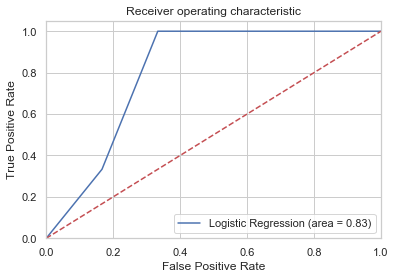

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [55]:
# save the model to disk
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(logreg, filename)

['finalized_model.sav']

In [56]:
# load the model from disk
loaded_model = joblib.load(filename)
Odi_test = pd.read_excel("ODI_Test.xlsx")
result = loaded_model.predict(Odi_test)
print(result)

[1 1 1 1 0]


In [57]:
# So the above result shows that Australia will win the series with 4 out of 5 win

In [58]:
# Now let us analyse who will be the Highest run scorer for the series

# for this information we will be requiring the bowling and over data from the main datasets

Batsman_MedianRun = RawDataSets.groupby(['Dates','Batsman'],as_index=False).Batsman_Runs.median()
Batsman_Mean = RawDataSets.groupby(['Dates','Batsman'],as_index=False).Batsman_Runs.mean()
Batsman_TotalRun = RawDataSets.groupby(['Dates','Batsman'],as_index=False).Batsman_Runs.sum()

Batsman_MedianRun.sort_values(by=['Batsman_Runs'], ascending=False).head()

,Dates,Batsman,Batsman_Runs
632,2016-01-12,RG Sharma,27.5
576,2013-11-02,RG Sharma,27.0
519,2013-10-16,RG Sharma,25.0
370,2009-11-05,SR Tendulkar,24.0
652,2016-01-17,GJ Maxwell,22.5


In [59]:
Batsman_TotalRun.sort_values(by=['Batsman_Runs'], ascending=False).head()

,Dates,Batsman,Batsman_Runs
576,2013-11-02,RG Sharma,209
370,2009-11-05,SR Tendulkar,175
632,2016-01-12,RG Sharma,171
555,2013-10-30,GJ Bailey,156
634,2016-01-12,SPD Smith,149


In [60]:
Batsman_Mean.sort_values(by=['Batsman_Runs'], ascending=False).head()

,Dates,Batsman,Batsman_Runs
632,2016-01-12,RG Sharma,28.500000
576,2013-11-02,RG Sharma,26.125000
519,2013-10-16,RG Sharma,23.500000
370,2009-11-05,SR Tendulkar,21.875000
644,2016-01-15,RG Sharma,20.666667


## We can see that in all the case Rohit Sharma is the highest run scorer, with a consistant average of 28 runs

In [61]:
# Next we have predict who will be the Highest wicket-taker

# Bowler_MedianWicket = RawDataSets.groupby(['Dates','Bowler'],as_index=False).Wicket.median()
# Bowler_MeanWicket = RawDataSets.groupby(['Dates','Bowler'],as_index=False).Wicket.mean()
Bowler_TotalWicket = RawDataSets.groupby(['Dates','Bowler'],as_index=False).Wicket.sum()

Bowler_TotalWicket.sort_values(by=['Wicket'], ascending=False).head()

,Dates,Bowler,Wicket
325,2012-02-19,BW Hilfenhaus,5
495,2016-01-20,KW Richardson,5
11,2006-09-22,B Lee,4
247,2009-11-05,CJ McKay,4
141,2008-02-17,IK Pathan,4


We see that there is a tie between the highest wicket taker, but since Ben is not playing this ODI, 
we will go with **_Kane William Richardson_** for the highest wicket tacker

In [63]:
# Now let us analyse who will hit the maximun sixes in this odi

Batsman_TotalSixes = RawDataSets.groupby(['Dates','Batsman'],as_index=False).Sixes.sum()

Batsman_TotalSixes.sort_values(by=['Sixes'], ascending=False).head()

,Dates,Batsman,Sixes
576,2013-11-02,RG Sharma,16
571,2013-11-02,GJ Maxwell,7
522,2013-10-16,V Kohli,7
632,2016-01-12,RG Sharma,7
529,2013-10-19,JP Faulkner,6


In [64]:
Batsman_MedianSixes = RawDataSets.groupby(['Dates','Batsman'],as_index=False).Sixes.median()

Batsman_MedianSixes.sort_values(by=['Sixes'], ascending=False).head()

,Dates,Batsman,Sixes
576,2013-11-02,RG Sharma,1.5
496,2013-10-13,CJ McKay,1.0
571,2013-11-02,GJ Maxwell,1.0
290,2009-10-25,Harbhajan Singh,1.0
555,2013-10-30,GJ Bailey,1.0


From the above analysis we can safely say that **_Rohit Sharma_** will hit the maximum numer of sixes

In [66]:
# Now lets see who will hit the maximun number of 4's in the series

Batsman_TotalFour = RawDataSets.groupby(['Dates','Batsman'],as_index=False).Fours.sum()

Batsman_TotalFour.sort_values(by=['Fours'], ascending=False).head()

,Dates,Batsman,Fours
370,2009-11-05,SR Tendulkar,19
564,2013-10-30,V Kohli,18
519,2013-10-16,RG Sharma,17
520,2013-10-16,S Dhawan,14
680,2016-01-20,S Dhawan,14


In [67]:
Batsman_MedianFour = RawDataSets.groupby(['Dates','Batsman'],as_index=False).Fours.median()

Batsman_MedianFour.sort_values(by=['Fours'], ascending=False).head()

,Dates,Batsman,Fours
519,2013-10-16,RG Sharma,3.0
28,2006-09-22,ML Hayden,2.5
668,2016-01-20,DA Warner,2.5
652,2016-01-17,GJ Maxwell,2.0
670,2016-01-20,GJ Maxwell,2.0


In [68]:
Batsman_MeanFour = RawDataSets.groupby(['Dates','Batsman'],as_index=False).Fours.mean()

Batsman_MeanFour.sort_values(by=['Fours'], ascending=False).head()

,Dates,Batsman,Fours
519,2013-10-16,RG Sharma,2.833333
564,2013-10-30,V Kohli,2.571429
370,2009-11-05,SR Tendulkar,2.375000
356,2009-11-02,V Sehwag,2.333333
28,2006-09-22,ML Hayden,2.250000


From the above analysis for the number of 4's hit by any batsman, we find that though "_SR Tendulkar_" has the highest number
of sixes against Australia, but since he is retired we will not consider him in our result  
The next second highest number of 4 hit by **_Virat Kholi_**, but we find that he is an outlier in this case, since his
Distribution of 4's runs is skewed to the right as the mean is greater than the median.  
Finally the 3rd highets 4's hitter is **_Rohit Sharma_**  with a mean of 2.83 and median of 3 which tells that his distribution 
is some what normal and we can safely bet on him
### Rohit Sharma the highest number of 4's in the series